In [1]:
import tensorflow as tf
from keras import layers, Sequential, datasets
import warnings
from matplotlib import pyplot as plt
import numpy as np
import random
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [2]:
warnings.filterwarnings('ignore')

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()

In [4]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
len(X_train)

60000

In [6]:
len(X_test)

10000

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
def show(index, i):
    plt.axis('off')
    ax = plt.subplot(3, 4, i+1)
    plt.imshow(X_train[index])
    plt.title(classes[y_train[index]])

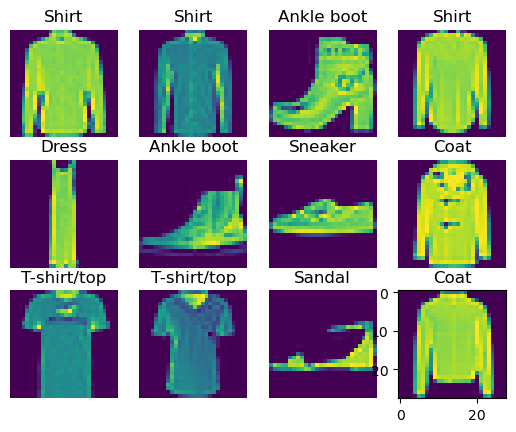

In [10]:
for i in range(12):
    show(random.randint(0, len(X_train) - 1), i)

In [11]:
X_train = X_train/255
X_test = X_test/255

In [28]:
model = Sequential([
    layers.Flatten(input_shape=(28, 28,)),
    layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5991 - accuracy: 0.7978
Epoch 2/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4616 - accuracy: 0.8417
Epoch 3/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4349 - accuracy: 0.8500
Epoch 4/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4222 - accuracy: 0.8539
Epoch 5/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4141 - accuracy: 0.8572
Epoch 6/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4071 - accuracy: 0.8593
Epoch 7/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4027 - accuracy: 0.8601
Epoch 8/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3988 - accuracy: 0.8623
Epoch 9/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3938 - accuracy: 0.8633
Epoch 10/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.393

In [29]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4711 - accuracy: 0.8384


[0.47113364934921265, 0.8384000062942505]

In [30]:
y_pred = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [31]:
def predictions(index):
    print("Y_TRUE = ", classes[y_test[index]])
    print("Y_PRED = ", classes[np.argmax(y_pred[index])])
    print()

In [32]:
for i in range(10):
    predictions(random.randint(0, 10000))

Y_TRUE =  Pullover
Y_PRED =  Pullover

Y_TRUE =  Dress
Y_PRED =  Dress

Y_TRUE =  Sneaker
Y_PRED =  Sneaker

Y_TRUE =  Ankle boot
Y_PRED =  Ankle boot

Y_TRUE =  Sneaker
Y_PRED =  Sneaker

Y_TRUE =  Shirt
Y_PRED =  Shirt

Y_TRUE =  T-shirt/top
Y_PRED =  T-shirt/top

Y_TRUE =  T-shirt/top
Y_PRED =  T-shirt/top

Y_TRUE =  T-shirt/top
Y_PRED =  T-shirt/top

Y_TRUE =  T-shirt/top
Y_PRED =  T-shirt/top



In [34]:
y_ = [np.argmax(val) for val in y_pred]

In [35]:
cm = confusion_matrix(y_test, y_)
cm

array([[778,   0,  16,  56,  10,   0, 123,   0,  17,   0],
       [  4, 944,   6,  30,   8,   0,   5,   1,   2,   0],
       [ 17,   2, 681,  10, 208,   0,  67,   0,  15,   0],
       [ 17,   7,  19, 866,  45,   0,  34,   0,  12,   0],
       [  0,   0,  68,  28, 854,   0,  41,   0,   9,   0],
       [  0,   0,   0,   1,   0, 928,   0,  42,   4,  25],
       [108,   1, 108,  43, 200,   0, 507,   0,  33,   0],
       [  0,   0,   0,   0,   0,  38,   0, 920,   0,  42],
       [  7,   1,   4,   8,   7,   4,  14,   4, 950,   1],
       [  0,   1,   0,   0,   0,  14,   1,  31,   0, 953]], dtype=int64)

Text(45.722222222222214, 0.5, 'TRUTH')

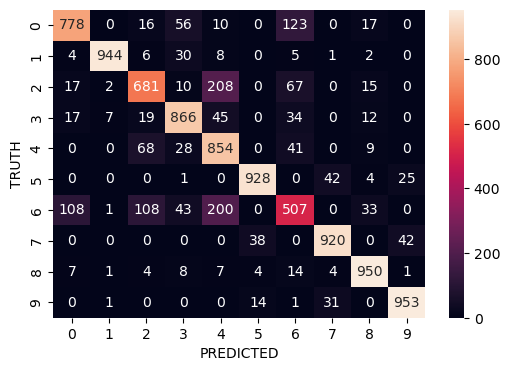

In [36]:
plt.figure(figsize=(6,4))
sn.heatmap(cm, annot=True, fmt='')
plt.xlabel('PREDICTED')
plt.ylabel('TRUTH')